In [1]:
print("radhe radhe")

radhe radhe


In [2]:
from dotenv import load_dotenv
import os

load_dotenv()

# IMPORT DATASET PATH
DATASET_PATH= os.getenv("DATASET_PATH")

In [3]:
import pandas as pd
# LOAD DATASET
df = pd.read_csv(DATASET_PATH)
df


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1901,17.970,21.334,26.523,31.712,32.202,32.075,28.830,28.260,28.071,27.048,21.739,18.100
1,1902,19.304,21.540,28.050,29.945,31.773,31.343,28.291,28.699,28.324,26.327,21.515,17.922
2,1903,19.092,20.611,26.948,31.629,33.581,30.709,29.313,28.320,28.031,26.142,21.093,17.255
3,1904,18.450,21.011,27.169,31.998,31.217,29.839,27.817,28.083,28.095,26.182,21.398,18.735
4,1905,18.249,18.904,25.173,28.574,30.625,32.965,28.291,28.349,27.829,26.294,21.700,18.011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1998,18.070,21.952,24.778,30.213,32.182,32.721,28.536,28.731,28.450,27.945,23.374,19.761
98,1999,18.755,22.955,27.970,32.615,31.950,30.624,28.197,28.106,27.746,27.029,22.881,20.175
99,2000,19.627,21.055,26.735,31.532,31.857,30.055,28.693,28.810,27.967,26.983,23.758,18.745
100,2001,18.593,22.214,27.048,31.377,32.261,29.266,27.803,28.854,29.007,27.648,24.193,19.848


In [4]:
import pandas as pd

class TemperatureDataTransformer:
    def __init__(self, data):
        """
        Initialize the class with the wide-format data.
        """
        self.df_wide = pd.DataFrame(data)

    def wide_to_long(self):
        """
        Transform the wide-format data into long format.
        """
        df_long = self.df_wide.melt(id_vars=['Year'], var_name='Month', value_name='Temperature')
        df_long['Date'] = pd.to_datetime(df_long['Year'].astype(str) + '-' + df_long['Month'] + '-01')
        df_long = df_long.set_index('Date')[['Temperature']]
        df_long=df_long.sort_index()
        return df_long

    def long_to_wide(self, df_long):
        """
        Transform the long-format data back into wide format.
        """
        df_long = df_long.reset_index()
        df_long['Year'] = df_long['Date'].dt.year
        df_long['Month'] = df_long['Date'].dt.month_name().str[:3]
        df_wide = df_long.pivot(index='Year', columns='Month', values='Temperature')
        # Reorder columns to match the original format
        month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        df_wide = df_wide[month_order]
        return df_wide.reset_index()


In [5]:
convert=TemperatureDataTransformer(df)
df_long=convert.wide_to_long()
df_long
# convert.long_to_wide(df_long=df_long)

,Temperature
Date,
1901-01-01,17.970
1901-02-01,21.334
1901-03-01,26.523
1901-04-01,31.712
1901-05-01,32.202
...,...
2002-08-01,28.106
2002-09-01,28.072
2002-10-01,26.541


In [6]:

import datetime
from dateutil.relativedelta import relativedelta  # Import relativedelta

# Define the train end date
train_end_date = datetime.datetime(1992, 12, 1)

# Calculate the test start date by adding 1 month
test_start = train_end_date + relativedelta(months=1)

train_data=df_long[:train_end_date]
test_data=df_long[test_start:]

In [7]:
train_data,test_data

(            Temperature
 Date                   
 1901-01-01       17.970
 1901-02-01       21.334
 1901-03-01       26.523
 1901-04-01       31.712
 1901-05-01       32.202
 ...                 ...
 1992-08-01       28.487
 1992-09-01       28.348
 1992-10-01       26.711
 1992-11-01       22.877
 1992-12-01       18.757
 
 [1104 rows x 1 columns],
             Temperature
 Date                   
 1993-01-01       19.656
 1993-02-01       22.851
 1993-03-01       26.131
 1993-04-01       29.796
 1993-05-01       31.958
 ...                 ...
 2002-08-01       28.106
 2002-09-01       28.072
 2002-10-01       26.541
 2002-11-01       22.598
 2002-12-01       19.701
 
 [120 rows x 1 columns])

### data prepration for Lstm model


In [8]:

# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

def split_sequence(sequence,n_step):
    X, y = [],[]
    for i in range(len(sequence)):
        end_ix = i + n_step
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
    

In [19]:
n_steps=12
X_train,y_train=split_sequence(train_data["Temperature"],n_step=n_steps)
X_test,y_test=split_sequence(test_data["Temperature"],n_step=n_steps)


C:\Users\subha\AppData\Local\Temp\ipykernel_12760\2745416145.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]


In [20]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((1092, 12), (1092,), (108, 12), (108,))

In [21]:
n_features=1
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],n_features)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],n_features)

In [22]:
X_train.shape,X_test.shape

((1092, 12, 1), (108, 12, 1))

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
35/35 [==============================] - 2s 5ms/step - loss: 71.4208
Epoch 2/200
35/35 [==============================] - 0s 6ms/step - loss: 4.9422
Epoch 3/200
35/35 [==============================] - 0s 6ms/step - loss: 2.0548
Epoch 4/200
35/35 [==============================] - 0s 6ms/step - loss: 1.3369
Epoch 5/200
35/35 [==============================] - 0s 6ms/step - loss: 1.0826
Epoch 6/200
21/35 [=================>............] - ETA: 0s - loss: 0.8934

In [108]:
# x_input = array([[60, 70, 80]])
# x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(X_test, verbose=2)
# print(yhat)
# print(x_input.shape)

4/4 - 0s - 255ms/epoch - 64ms/step


In [109]:
pred=yhat.flatten()

In [110]:
y_test,pred

(array([19.885, 21.347, 27.47 , 29.959, 32.763, 30.565, 28.314, 28.07 ,
        28.159, 26.8  , 22.579, 19.104, 18.021, 21.533, 26.554, 31.294,
        32.306, 31.656, 28.385, 28.509, 28.031, 26.538, 22.576, 19.429,
        19.715, 21.205, 27.954, 29.957, 33.317, 29.831, 28.924, 27.716,
        28.831, 26.204, 22.495, 18.647, 18.424, 20.906, 27.213, 28.731,
        32.165, 31.968, 28.273, 28.127, 27.754, 26.655, 23.544, 19.249,
        18.07 , 21.952, 24.778, 30.213, 32.182, 32.721, 28.536, 28.731,
        28.45 , 27.945, 23.374, 19.761, 18.755, 22.955, 27.97 , 32.615,
        31.95 , 30.624, 28.197, 28.106, 27.746, 27.029, 22.881, 20.175,
        19.627, 21.055, 26.735, 31.532, 31.857, 30.055, 28.693, 28.81 ,
        27.967, 26.983, 23.758, 18.745, 18.593, 22.214, 27.048, 31.377,
        32.261, 29.266, 27.803, 28.854, 29.007, 27.648, 24.193, 19.848,
        19.528, 22.792, 27.747, 30.812, 32.78 , 30.951, 29.2  , 28.106,
        28.072, 26.541, 22.598, 19.701]),
 array([19.037848, 21.

In [ ]:
# r2 92 in n_step=5 and lare=2 (50,50)
# r2 97 in n_step=12 and lare=2 (50,50)
# r2 96 in n_step=12 and lare=2 (100,50)
# r2 94 in n_step=12 and lare=2 (100,10)
# r2 95.8 in n_step=12 and lare=2 (100,100)

In [112]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.9627966742050521

Text(0, 0.5, 'temp')

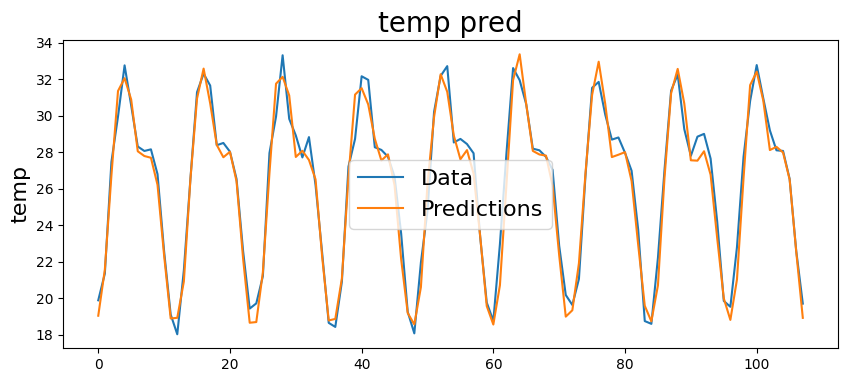

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

# plt.plot(test_data[month])
# plt.plot(predictions)
plt.plot(y_test)
plt.plot(pred)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('temp pred', fontsize=20)
plt.ylabel('temp', fontsize=16)